In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from IPython.display import display
from scripts.random_profiles import RandomProfileGenerator
from scripts.profile_reader2 import ProfileReader
pd.options.display.max_rows = 30
pd.options.display.max_columns = 300
%matplotlib inline

# ensure reprodicible results
np.random.seed(42) 

pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')

# read in data.
data = pr.get_profile(index=['mech'])
data = pr.impute(data, how='group_mean')
mech = 'HDAC inhibitor'


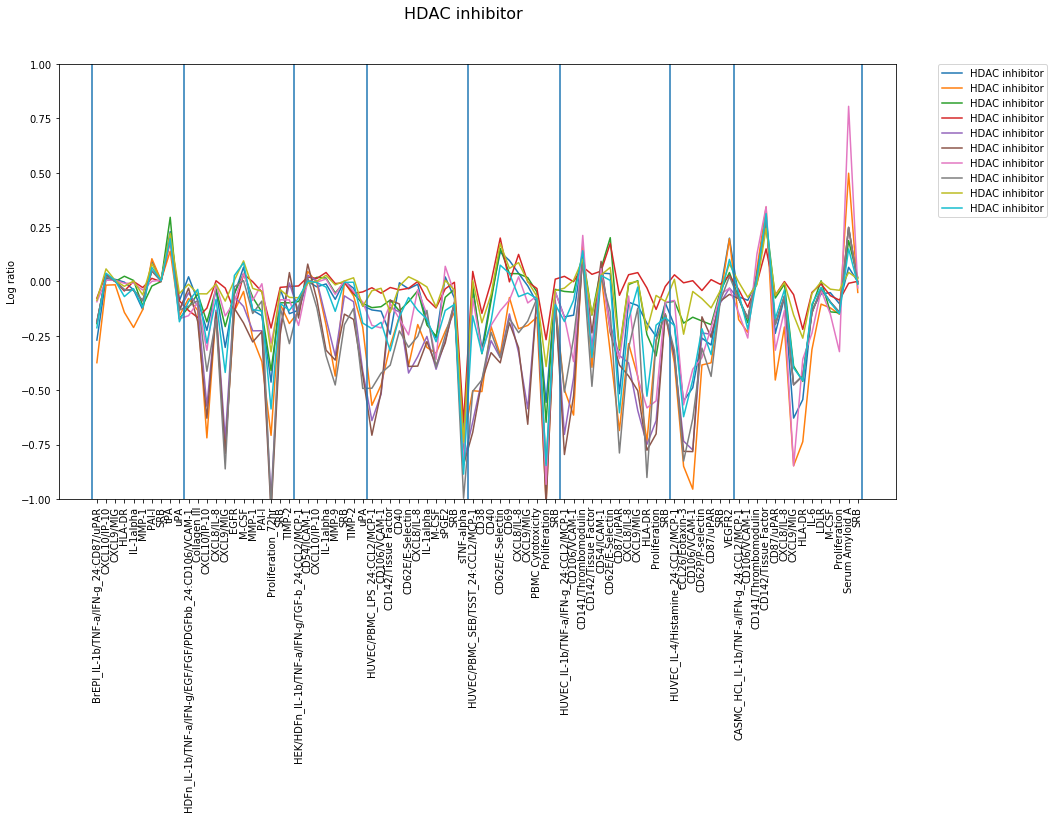

In [21]:
pos_class = data.loc[[mech]]

pr.plot(data=pos_class, title=mech, ylim=[-1,1])

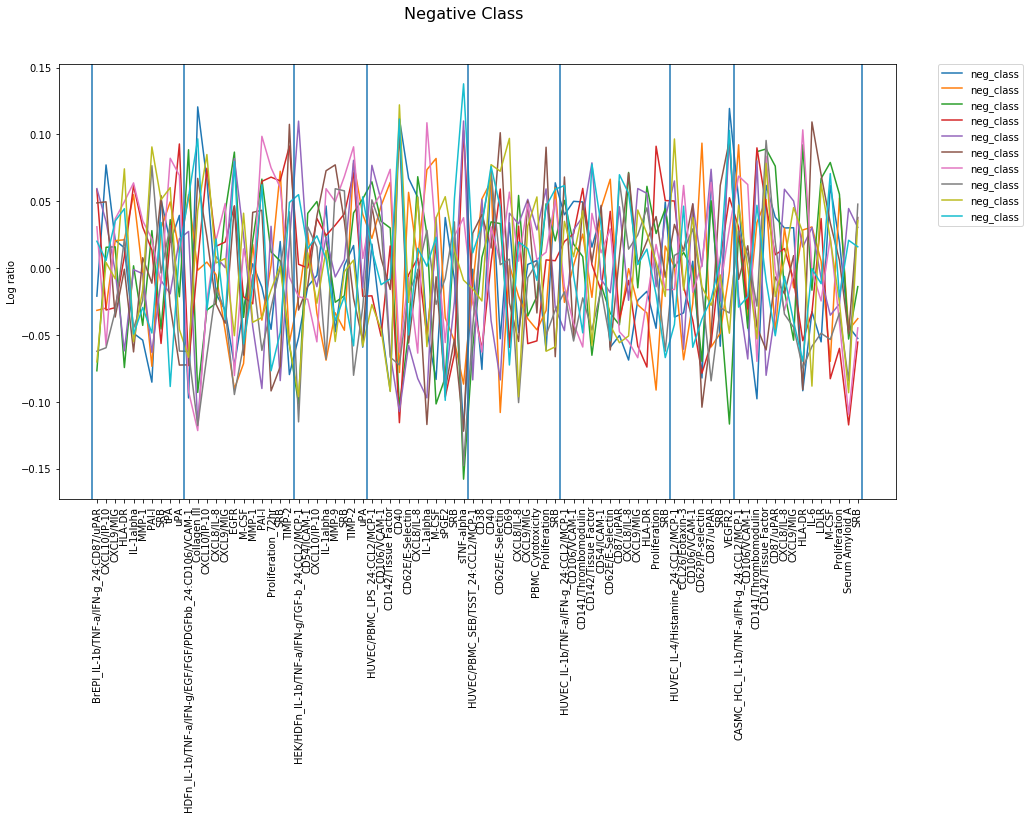

In [22]:
rpg = RandomProfileGenerator(envelope_file='data\\SigEnvelopeFile.xml', data_file=data, skip_cols=0)
neg_class = rpg.get_neg_class(prof_num=len(pos_class), dist='rand')
pr.plot(data=neg_class, title='Negative Class');

In [30]:
all_class = pd.concat([pos_class, neg_class]).reset_index(drop=False)
all_class[['mech']].iloc[0,0]
# encode mechanism to int values
#all_class['mech'] = all_class['mech'].map({mech: 1, 'neg_class': 0})
#all_class

'HDAC inhibitor'

ValueError: not enough values to unpack (expected 2, got 1)

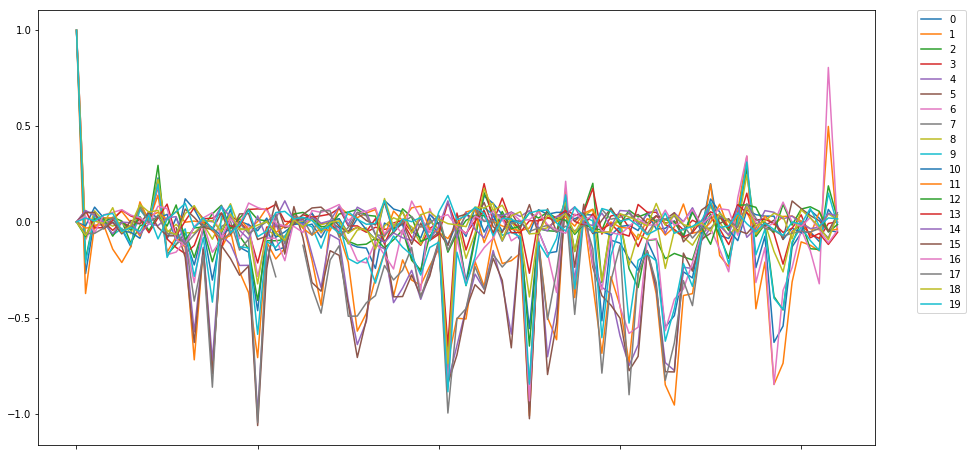

In [14]:
pr.plot(data=all_class, title='All Class')